# K-Means Clustering from Scratch
Implementation of K-Means clustering algorithm for wine dataset analysis

## 1. Data Preparation
Loading and preprocessing the Wine dataset

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

### Dataset Overview
The Wine dataset contains:
- 178 samples of wine
- 13 chemical features 
- 3 target classes (cultivars)

Features include alcohol content, malic acid, flavonoids, etc.

In [11]:
df = load_wine(as_frame=True).frame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 2. Algorithm Overview
K-Means clustering steps:
1. **Initialization**: Randomly select K centroids
2. **Assignment**: Assign points to nearest centroid
$$ \text{argmin}_j \ ||x^{(i)} - \mu_j||^2 $$
3. **Update**: Recalculate centroids as cluster means
$$ \mu_j := \frac{1}{|C_j|} \sum_{i \in C_j} x^{(i)} $$
4. **Repeat** until convergence or max iterations

## 3. Core Algorithm Implementation

### 3.1 Centroid Initialization
Randomly select K data points as initial centroids

In [12]:
def random_init_centroids(X,K):
    n = X.shape[0]

    rdx = np.random.choice(n,K)

    centroids = X[rdx]

    return centroids

### 3.2 Cluster Assignment
Find closest centroid for each point using Euclidean distance:
$$ d(x, \mu) = \sqrt{\sum_{i=1}^n (x_i - \mu_i)^2} $$

In [13]:
def find_closest_centroid(X,centroids):

    K = centroids.shape[0]
    idx=np.zeros(X.shape[0])

    for i in range(len(idx)):# for each row of X
        min_d = np.inf
        for j in range(K): #to each centroid 
            dist = np.linalg.norm(X[i]-centroids[j])
            if dist<min_d:
                min_d=dist
                idx[i]=j
    return idx

### 3.3 Centroid Update
Recalculate centroids as mean of assigned points:
$$ \mu_j^{(new)} = \frac{1}{|C_j|} \sum_{x \in C_j} x $$

In [14]:
def compute_centroid(X,K,idx):

    centroids = np.zeros((K,X.shape[1]))

    for i in range(K):
        pts= X[idx==i]
        centroids[i] = np.mean(pts,axis=0)

    return centroids

### 3.4 Main Algorithm Loop
Iterate between assignment and update steps

In [15]:
def run_KMeans(X,init_centroids,max_iters,K):
    centroids=init_centroids
    for i in range(max_iters):
        idx = find_closest_centroid(X,centroids)
        centroids = compute_centroid(X,K,idx)
        visualize(X, centroids, idx, i, pca)
    return centroids,idx

## 4. Visualization & Dimensionality Reduction

In [16]:
def visualize(X, centroids, idx, iteration, pca):
    # Transform both the data and centroids using the fitted PCA
    X_vis = pca.transform(X)
    centroids_vis = pca.transform(centroids)
    
    plt.figure(figsize=(3, 2))
    K = centroids.shape[0]
    for k in range(K):
        plt.scatter(X_vis[idx == k, 0], X_vis[idx == k, 1], label=f"Cluster {k+1}")
    plt.scatter(centroids_vis[:, 0], centroids_vis[:, 1],
                c='black', marker='X', s=200)
    plt.title(f"Iteration {iteration}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    
    plt.show()

## 5. Model Training & Evaluation

### Hyperparameter Setup
- K=3 (matches known wine cultivars)
- Max iterations=10
- MinMax scaling for feature normalization

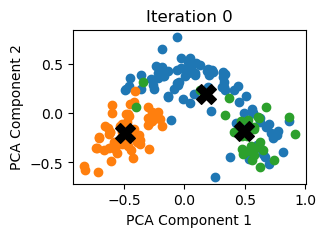

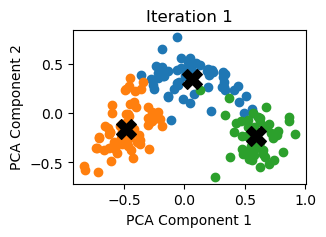

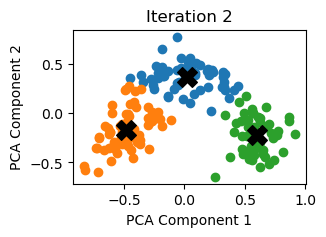

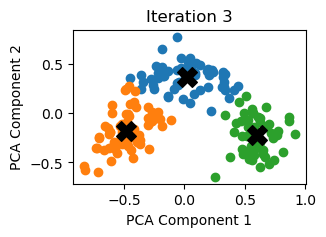

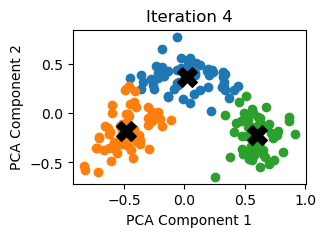

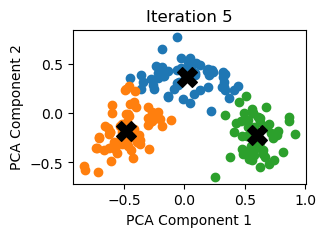

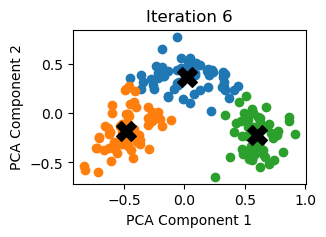

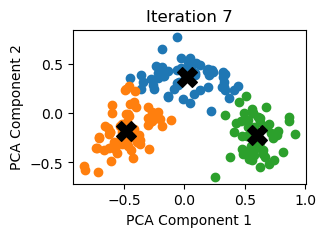

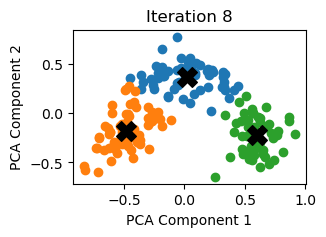

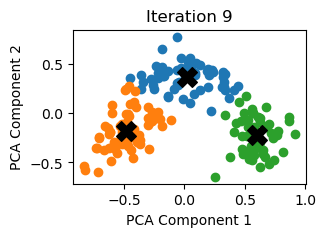

In [17]:
K = 3
max_iters = 10
init_centroids = random_init_centroids(X, K)
centroids, idx = run_KMeans(X, init_centroids, max_iters, K)